# Analyse de données sur les films à Hollywood entre 2007 et 2011

J'ai décidé de m'intéresser aux différents films à Hollywood entre les années 200è et 2011, en regardant les différents genres, profits, et retours de l'audience.

### Récupération et traitement de données

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
url = "https://public.tableau.com/app/sample-data/HollywoodsMostProfitableStories.csv"
df = pd.read_csv(url)

In [5]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


Nous voyons ici les premières lignes du tableau ainsi que toutes les colonnes. Je souhaite maintenant voir le nombre de réponses vides dans chaque colonne, c'est-à-dire des données non remplies, qui sont donc inintéressantes ici.

In [17]:
df.isnull().sum()

Film                 0
Genre                0
Lead_studio          1
Audience  score %    1
Profitability        3
Rotten Tomatoes %    1
Worldwide Gross      0
Year                 0
dtype: int64

On peut alors remplir ces données par 0 par exemple pour le profit fait, mais cette décision est arbitraire. On pourrait aussi chercher sur internet le réel profit réalisé pour remplir plus proprement.

In [7]:
df.Profitability.fillna(0)

0     5.343622
1     8.096000
2     0.448645
3     4.382857
4     0.652603
        ...   
69    6.267647
70    0.000000
71    1.211818
72    1.090000
73    1.747542
Name: Profitability, Length: 74, dtype: float64

### Analyse du tableau 

On peut maintenant sortir certaines informations sur le tableau, notamment ces dimensions :

In [18]:
df.shape

(74, 8)

Il y a donc 74 lignes et 8 colonnes.

In [19]:
df.dtypes

Film                  object
Genre                 object
Lead_studio           object
Audience  score %    float64
Profitability        float64
Rotten Tomatoes %    float64
Worldwide Gross      float64
Year                   int64
dtype: object

On obtient ici les types de nos objets dans le tableau. On voit que les objets dans "Year" sont des "int64" alors que dans les autres sont des "float64". On peut changer ce type :

In [20]:
df.Year.astype("float64")

0     2008.0
1     2009.0
2     2011.0
3     2009.0
4     2007.0
       ...  
69    2008.0
70    2010.0
71    2010.0
72    2010.0
73    2008.0
Name: Year, Length: 74, dtype: float64

Cela n'est pas pour autant très utile dans ce cas particulier.

In [8]:
df.sort_values(by= ["Audience  score %"])

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
27,Love Happens,Drama,Universal,40.0,2.004444,18.0,36.080000,2009
55,The Heartbreak Kid,Comedy,Paramount,41.0,2.129444,30.0,127.766650,2007
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040000,2010
20,Killers,Action,Lionsgate,45.0,1.245333,11.0,93.400000,2010
...,...,...,...,...,...,...,...,...
35,My Week with Marilyn,Drama,The Weinstein Company,84.0,0.825800,83.0,8.258000,2011
51,Tangled,Animation,Disney,88.0,1.365692,89.0,355.080000,2010
67,WALL-E,Animation,Disney,89.0,2.896019,96.0,521.283432,2008
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011


Ici, on a trié les films selon le pourcentage donné par l'audience, ce qui permet de plus facilement choisir un film, basé sur les retours de l'audience.

Je remarque aussi qu'il y a des titres avec des espaces, ce qui n'est pas pratique pour utiliser les différentes commandes : je préfère donc la renommer en snake case.

In [9]:
df.rename(columns={ "Lead Studio": "Lead_studio"}, inplace=True)

In [49]:
df.rename(columns={ "Rotten Tomatoes %": "Rotten_tomatoes_per"}, inplace=True)

In [50]:
df.rename(columns={ 'Audience  score %': "Audience_score_per"}, inplace=True)

In [51]:
df.head()

,Film,Genre,Lead_studio,Audience_score_per,Profitability,Rotten_tomatoes_per,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


On vérifie que les colonnes ont bien été renommées.

On peut chercher la valeur moyenne en pourcentage sur le score de l'audience :

In [11]:
mean_AS = df["Audience  score %"].mean()

In [13]:
print(mean_AS)

64.13698630136986


Cela est une moyenne assez satisfaisante en tenant compte du fait qu'il y a beaucoup de personnes qui votent, ces films ont donc globalement été bien appréciés. On peut aussi chercher les valeurs maximales et minimales du score donné par l'audience.

In [53]:
max_AS = df["Audience_score_per"].max()

In [54]:
print(max_AS)

89.0


Cette commande témoigne bien du fait qu'il n'y a jamais eu un film aimé à 100% par tous.

On peut voir ceux qui ont un score d'audience plus élevé que 65%, soit plus que la moyenne.

In [55]:
df.Audience_score_per > 65

0      True
1      True
2      True
3     False
4      True
      ...  
69     True
70    False
71    False
72    False
73     True
Name: Audience_score_per, Length: 74, dtype: bool

In [31]:
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,73.000000,71.000000,73.000000,74.000000,74.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.054054
std,13.647665,8.292017,26.242655,157.067561,1.353756
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


Cette fonction permet d'obtenir directement les données intéressantes sur le tableau, sur toutes les colonnes. 

Nous pouvons également voir les différentes années sur lesquelles les films ont été évalués, pour rendre compte de l'étendue dans les données.

In [14]:
df.Year.unique()

array([2008, 2009, 2011, 2007, 2010], dtype=int64)

J'aimerais trouver le nombre de films réalisés dans chaque studio, pour cela je cherche dans un premier temps la liste des différents studios évoqués dans le tableau.

In [22]:
df.Lead_studio.unique()

array(['Fox', 'Independent', 'Universal', 'Sony', 'Disney',
       'Warner Bros.', 'Lionsgate', 'Summit', '20th Century Fox',
       'The Weinstein Company', nan, 'New Line', 'Paramount', 'CBS'],
      dtype=object)

In [23]:
LS = ['Fox', 'Independent', 'Universal', 'Sony', 'Disney',
       'Warner Bros.', 'Lionsgate', 'Summit', '20th Century Fox',
       'The Weinstein Company', 'New Line', 'Paramount', 'CBS']

In [25]:
    for studio in LS:
        count=0
        for i in range(74):
            if df.iloc[i-1,2] == studio :
                count += 1
        print(f"{count} ont lieu au studio {studio}")


6 ont lieu au studio Fox
19 ont lieu au studio Independent
7 ont lieu au studio Universal
4 ont lieu au studio Sony
7 ont lieu au studio Disney
12 ont lieu au studio Warner Bros.
2 ont lieu au studio Lionsgate
5 ont lieu au studio Summit
2 ont lieu au studio 20th Century Fox
3 ont lieu au studio The Weinstein Company
1 ont lieu au studio New Line
4 ont lieu au studio Paramount
1 ont lieu au studio CBS


On peut également compter les studios d'une autre manière en utilisant "group by".

In [26]:
by_studio= df.groupby(by="Lead_studio")

In [27]:
by_studio.size()

Lead_studio
20th Century Fox          2
CBS                       1
Disney                    7
Fox                       6
Independent              19
Lionsgate                 2
New Line                  1
Paramount                 4
Sony                      4
Summit                    5
The Weinstein Company     3
Universal                 7
Warner Bros.             12
dtype: int64

On retrouve bien les mêmes résultats avec les deux méthodes, bien que la deuxième soit plus rapide/facile.

Je souhaite voir la répartition des pourcentages dans les films dans un histogramme, qui a l'avantage d'être beaucoup plus représentatif visuellement.

<Axes: >

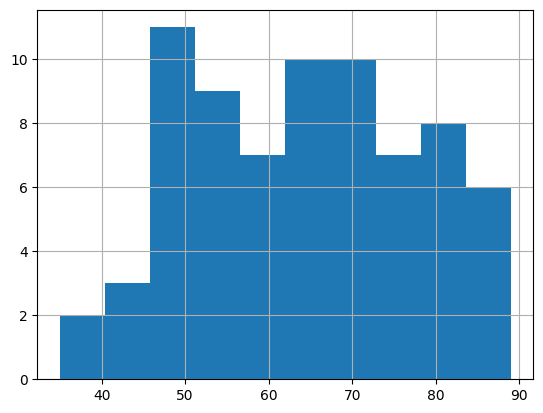

In [37]:
df.Audience_score_per.hist()

Je renomme ces colonnes pour éviter qu'il y ait un espace et donc que certaines commandes ne fonctionnent pas

In [38]:
df.head()

,Film,Genre,Lead_studio,Audience_score_per,Profitability,Rotten_tomatoes_per,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [39]:
df.loc[3,'Worldwide Gross']

30.68

In [40]:
group = df.groupby("Year")

In [41]:
group.get_group(2007)

,Film,Genre,Lead_studio,Audience_score_per,Profitability,Rotten_tomatoes_per,Worldwide Gross,Year
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
7,Enchanted,Comedy,Disney,80.0,4.005737,93.0,340.487652,2007
13,Good Luck Chuck,Comedy,Lionsgate,61.0,2.367685,3.0,59.192128,2007
21,Knocked Up,Comedy,Universal,83.0,6.636402,91.0,219.001261,2007
24,License to Wed,Comedy,Warner Bros.,55.0,1.980206,8.0,69.307224,2007
34,Music and Lyrics,Romance,Warner Bros.,70.0,3.647411,63.0,145.896422,2007
38,No Reservations,Comedy,NaN,64.0,3.307180,39.0,92.601050,2007
43,P.S. I Love You,Romance,Independent,82.0,5.103117,21.0,153.093505,2007
55,The Heartbreak Kid,Comedy,Paramount,41.0,2.129444,30.0,127.766650,2007
63,Tyler Perry's Why Did I get Married,Romance,Independent,47.0,3.724192,46.0,55.862886,2007


Cela me permet d'accéder à tous les films de 2007 dans ces données.
Je pourrai également refaire la même chose mais en classant par genre, ce qui permettrait d'accéder directement à toutes les comédies par exemple, et donc de faciliter certaines recherches.

Je veux maintenant trouver les comédies de 2007 directement.

In [42]:
df_comedy = df.query("Genre == 'Comedy' ")

In [43]:
df_2007 = df.query("Year == 2007 ")

In [44]:
pd.merge(df_comedy, df_2007)

,Film,Genre,Lead_studio,Audience_score_per,Profitability,Rotten_tomatoes_per,Worldwide Gross,Year
0,Enchanted,Comedy,Disney,80.0,4.005737,93.0,340.487652,2007
1,Good Luck Chuck,Comedy,Lionsgate,61.0,2.367685,3.0,59.192128,2007
2,Knocked Up,Comedy,Universal,83.0,6.636402,91.0,219.001261,2007
3,License to Wed,Comedy,Warner Bros.,55.0,1.980206,8.0,69.307224,2007
4,No Reservations,Comedy,NaN,64.0,3.307180,39.0,92.601050,2007
5,The Heartbreak Kid,Comedy,Paramount,41.0,2.129444,30.0,127.766650,2007


De la même manière, je peux appronfondir les contraintes pour m'adapter aux demandes d'un spectateur par exemple.
Je veux maintenant faire des graphiques plus détaillés, j'utilise pour cela seaborn.

In [45]:
import seaborn as sns

Dans un premier temps, je souhaite voir la répartition des scores donnés par l'audience au cours des ans. De cette manière, je peux voir l'étalement des scores notamment.

C:\Users\chata\miniconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


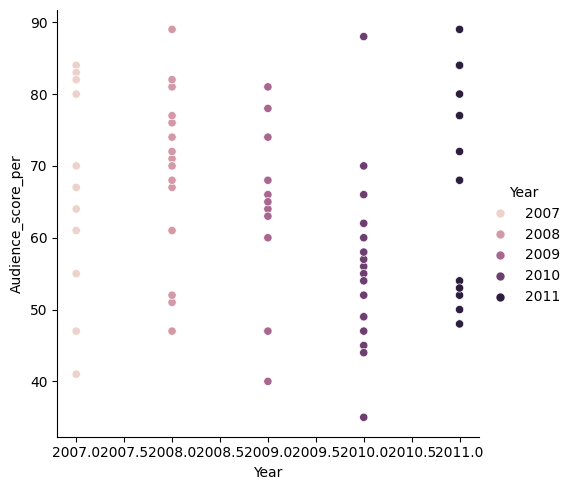

In [47]:
sns.relplot(data=df, x='Year', y='Audience_score_per',hue = 'Year')

C:\Users\chata\miniconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


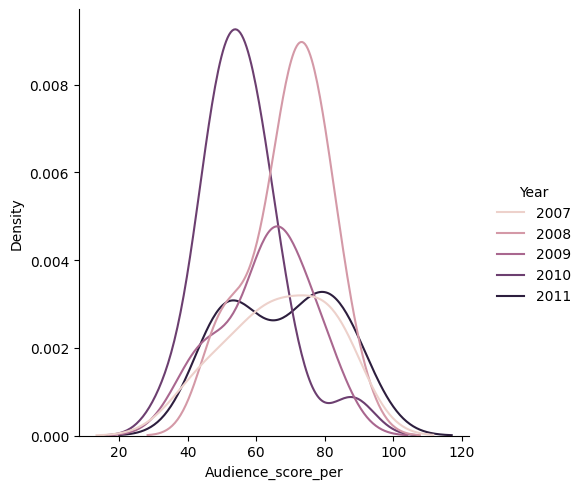

In [39]:
sns.displot(data=df,x='Audience_score_per',hue='Year',kind='kde');

Ce graphique rejoint ma première idée de voir la répartition des scores de l'audience en montrant la densité pour chaque score. On peut notamment voir que certaines années ont eu des films avec des scores très homogènes, comme en 2010 ou 2008, et d'autres très hétérogènes. C'est aussi ce qu'on voit dans le graphique d'avant.

C:\Users\chata\miniconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


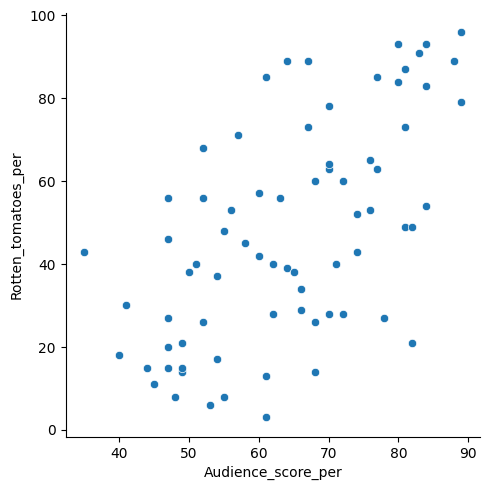

In [59]:
sns.relplot(data=df, x='Audience_score_per', y='Rotten_tomatoes_per')

Je voulais voir s'il y avait un lien entre le score de l'audience et les tomates pourries. Finalement, il est difficile d'en déduire une évolution, mais il semble quand même avoir un poucentage de tomates pourries lorsque le score de l'audience est plus élevé aussi. 

On peut alors se demander l'influence du genre sur le score et les tomates pourries.

C:\Users\chata\miniconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


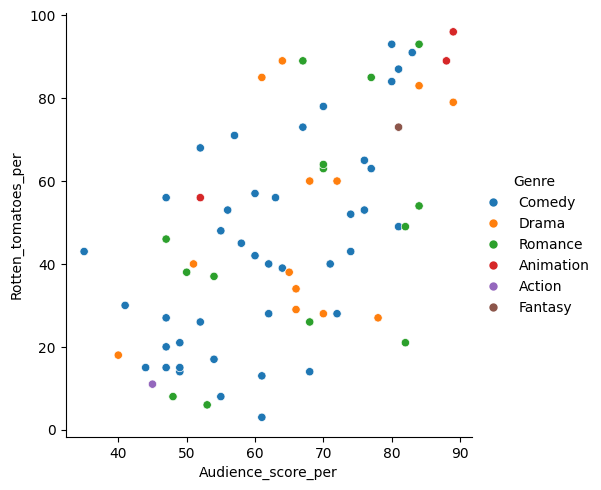

In [60]:
sns.relplot(data=df, x='Audience_score_per', y='Rotten_tomatoes_per', hue='Genre')

Néanmoins, il ne semble pas voir un lien direct entre ces critères.

Pour finir, je veux voir s'il y a un lien entre le score de l'audience et le studio, permettant de voir l'influence du studio.

C:\Users\chata\miniconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


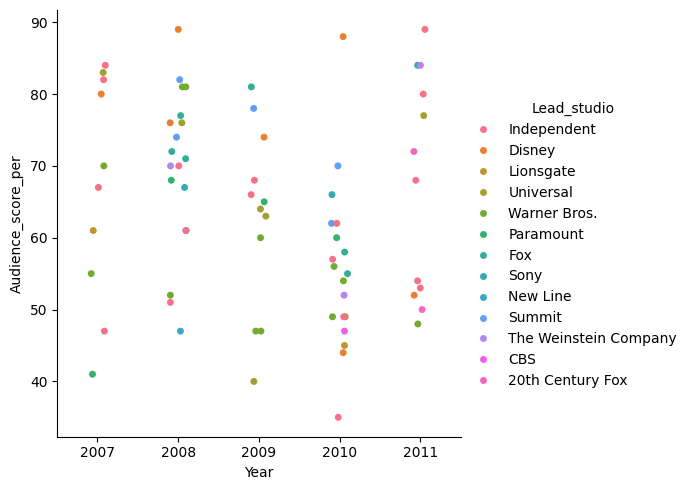

In [65]:
sns.catplot(data=df,x='Year', hue='Lead_studio',y='Audience_score_per')

In [68]:
for studio in LS:
    moy=0
    count=0
    somme=0
    for i in range(74):
        if df.iloc[i-1,2] == studio :
            somme += df.iloc[i-1,3]
            count += 1
    moy= somme/count
    print(f"{moy} est la moyenne du score de l'audience obtenue au studio {studio}")

69.0 est la moyenne du score de l'audience obtenue au studio Fox
nan est la moyenne du score de l'audience obtenue au studio Independent
64.57142857142857 est la moyenne du score de l'audience obtenue au studio Universal
69.5 est la moyenne du score de l'audience obtenue au studio Sony
71.85714285714286 est la moyenne du score de l'audience obtenue au studio Disney
58.333333333333336 est la moyenne du score de l'audience obtenue au studio Warner Bros.
53.0 est la moyenne du score de l'audience obtenue au studio Lionsgate
73.2 est la moyenne du score de l'audience obtenue au studio Summit
61.0 est la moyenne du score de l'audience obtenue au studio 20th Century Fox
68.66666666666667 est la moyenne du score de l'audience obtenue au studio The Weinstein Company
47.0 est la moyenne du score de l'audience obtenue au studio New Line
58.5 est la moyenne du score de l'audience obtenue au studio Paramount
47.0 est la moyenne du score de l'audience obtenue au studio CBS


On remarque que la moyenne du score de l'audience en pourcentage la plus élevée est au studio Summit, ce qui est assez cohérent avec le graphique au dessus. On observe qu'il y a des studios avec des moyennes bien plus basses, à voir si cela est lié au lieu en lui-même ou au genre de films qui y est diffusé.

## Conclusion

Dans cette étude des films à Hollywood, nous avons pu étudier les retours de l'audience et les genres selon les années, et surtout étudier les différentes influences sur les retours etc. 